# Analisis Pengaduan Layanan Digital Disney Hotstar

## Konteks Data
Data ini berisi informasi tentang pengaduan pelanggan, yang mencakup:
- **Isi Keluhan**: Jenis keluhan yang diajukan oleh pelanggan.
- **Cara Pengaduan**: Media yang digunakan oleh pelanggan untuk menyampaikan keluhan (misalnya, Customer Care Call, Email).
- **Lokasi Pelanggan**: Informasi mengenai lokasi pelanggan, meliputi kota, provinsi, dan kode pos.
- **Status Keluhan**: Hasil akhir dari pengaduan (misalnya, Closed, Open, Solved, Pending).
- **Waktu Pengaduan**: Tanggal dan waktu saat keluhan diajukan oleh pela.
a, "Yes", "No").


## Deskripsi Variabel Kolom
| Variabel                        | Deskripsi                                                                                     |
|----------------------------------|-----------------------------------------------------------------------------------------------|
| **Ticket #**                     | Identifikasi unik untuk setiap tiket komplain. Nomor ini digunakan untuk melacak dan merujuk ke komplain individual. |
| **Customer Complaint**           | Deskripsi singkat mengenai komplain yang diajukan oleh pelanggan terkait layanan atau produk. |
| **Date**                         | Tanggal saat komplain diajukan.                                                                |
| **Date_month_year**              | Versi format tanggal yang menunjukkan bulan dan tahun saat komplain diajukan.                |
| **Time**                         | Waktu saat komplain diajukan.                                                                  |
| **Received Via**                 | Platform atau metode yang digunakan untuk menerima komplain (misalnya, Customer Care Call, Email, Web, dll.). |
| **City**                         | Kota tempat pelanggan berada saat mengajukan komplain.                                        |
| **State**                        | Provinsi tempat pelanggan berada saat mengajukan komplain.                                    |
| **Zip code**                     | Kode pos lokasi tempat komplain diajukan.                                                     |
| **Status**                       | Status terkini dari komplain (misalnya, "Closed", "Open", "Pending").                         |
| **Filing on Behalf of Someone**  | Menunjukkan apakah komplain diajukan oleh pelanggan itu sendiri atau atas nama orang lain (misalnya, "Yes", "No"). |

### Importing Data

In [6]:
pip install psycopg2 sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sqlalchemy import create_engine

# Informasi koneksi
DB_HOST = "pg-techtest-this-d337.h.aivencloud.com"
DB_PORT = "22376"
DB_NAME = "defaultdb"
DB_USER = "analyst1"
DB_PASSWORD = "AVNS_qHyTk32MUCpqotPjlpE"

# Membuat URL koneksi
url = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Membuat engine SQLAlchemy
engine = create_engine(url)

# Membaca tabel ke DataFrame
try:
    query = "SELECT * FROM tb_tech_test;"
    df = pd.read_sql(query, engine)
    print(df.head())  # Menampilkan 5 baris pertama
except Exception as e:
    print("Terjadi kesalahan:", e)


  Ticket #                                 Customer Complaint      Date  \
0   250635                       Disney Cable Internet Speeds  22-04-15   
1   223441       Payment disappear - service got disconnected  4/8/2015   
2   242732                                  Speed and Service  18-04-15   
3   277946  Disney Imposed a New Usage Cap of 300GB that p...  5/7/2015   
4   307175          Disney not working and no service to boot  26-05-15   

  Date_month_year         Time        Received Via      City     State  \
0       22-Apr-15   3:53:50 PM  Customer Care Call  Abingdon  Maryland   
1        4-Aug-15  10:22:56 AM            Internet   Acworth   Georgia   
2       18-Apr-15   9:55:47 AM            Internet   Acworth   Georgia   
3        5-Jul-15  11:59:35 AM            Internet   Acworth   Georgia   
4       26-May-15   1:25:26 PM            Internet   Acworth   Georgia   

  Zip code  Status Filing on Behalf of Someone;;  
0    21009  Closed                          No;;  
1 

### 1. Descriptive Information

In [9]:
df = pd.read_sql(query, engine)
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No;;
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No;;
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes;;
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes;;
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No;;


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Ticket #                       2224 non-null   object
 1   Customer Complaint             2106 non-null   object
 2   Date                           2106 non-null   object
 3   Date_month_year                2106 non-null   object
 4   Time                           2106 non-null   object
 5   Received Via                   2106 non-null   object
 6   City                           2106 non-null   object
 7   State                          2106 non-null   object
 8   Zip code                       2106 non-null   object
 9   Status                         2106 non-null   object
 10  Filing on Behalf of Someone;;  2106 non-null   object
dtypes: object(11)
memory usage: 191.3+ KB


### 2. Memperbaiki Format Data

Berdasarkan hasil dari descriptive information (tabel dan info data) pada tahapan sebelumnya, bisa kita lihat bahwa ada beberapa hal yang berpotensi mengganggu tahap data processing. Oleh karena itu kita perlu melakukan perbaikan format data.

In [13]:
# Menghapus ';;' dari kolom 'Filing on Behalf of Someone;;'
df['Filing on Behalf of Someone;;'] = df['Filing on Behalf of Someone;;'].str.replace(';;', '', regex=False)

In [14]:
# Normalisasi nama kolom
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
# Menghapus ';;' dari nama kolom
df.columns = df.columns.str.replace(';;', '', regex=False)

In [15]:
# Memeriksa beberapa nilai pertama setelah pembersihan di kolom 'Filing on Behalf of Someone'
print(df['filing_on_behalf_of_someone'].unique())

['No' 'Yes' None 'No;']


In [16]:
# Menghapus ';;', '; ', dan spasi ekstra di setiap nilai kolom
df['filing_on_behalf_of_someone'] = df['filing_on_behalf_of_someone'].str.replace(';', '').str.strip()
print(df['filing_on_behalf_of_someone'].unique())

['No' 'Yes' None]


In [17]:
# Mengubah isi kolom 'customer_complaint' menjadi huruf kapital
df['customer_complaint'] = df['customer_complaint'].apply(lambda x: x.upper() if isinstance(x, str) else x)

In [18]:
# Deteksi format berbeda
def parse_date(date):
    try:
        return pd.to_datetime(date, format='%d-%m-%y', errors='coerce')
    except:
        return pd.to_datetime(date, format='%m/%d/%Y', errors='coerce') 

In [19]:
# Menstandarkan penulisan waktu
df['date'] = df['date'].apply(parse_date)

In [20]:
df.head()

,ticket_#,customer_complaint,date,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone
0,250635,DISNEY CABLE INTERNET SPEEDS,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,NaT,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,SPEED AND SERVICE,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,DISNEY IMPOSED A NEW USAGE CAP OF 300GB THAT P...,NaT,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,DISNEY NOT WORKING AND NO SERVICE TO BOOT,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [21]:
df['date'] = df['date'].fillna(pd.to_datetime(df['date_month_year'], format='%d-%b-%y', errors='coerce'))
df.head()

,ticket_#,customer_complaint,date,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone
0,250635,DISNEY CABLE INTERNET SPEEDS,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,2015-08-04,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,SPEED AND SERVICE,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,DISNEY IMPOSED A NEW USAGE CAP OF 300GB THAT P...,2015-07-05,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,DISNEY NOT WORKING AND NO SERVICE TO BOOT,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### 3. Handle Missing value & duplication

In [23]:
# Cek missing value
df.isnull().sum()

ticket_#                         0
customer_complaint             118
date                           118
date_month_year                118
time                           118
received_via                   118
city                           118
state                          118
zip_code                       118
status                         118
filing_on_behalf_of_someone    118
dtype: int64

In [24]:
# Menghapus baris yang memiliki missing value di seluruh kolom
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 0 to 2222
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ticket_#                     2106 non-null   object        
 1   customer_complaint           2106 non-null   object        
 2   date                         2106 non-null   datetime64[ns]
 3   date_month_year              2106 non-null   object        
 4   time                         2106 non-null   object        
 5   received_via                 2106 non-null   object        
 6   city                         2106 non-null   object        
 7   state                        2106 non-null   object        
 8   zip_code                     2106 non-null   object        
 9   status                       2106 non-null   object        
 10  filing_on_behalf_of_someone  2106 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1

In [25]:
# Mendeteksi duplikasi baris
df.duplicated().sum()

0

Berdasarkan deteksi duplikasi baris, tidak terdapat adanya duplikasi. Oleh karena itu, kegiatan duplikasi tidak diperlukan.

### 4. EDA

#### 4.1. Descriptive Statistics

Kegiatan descriptive statistics ini ditujukan untuk melihat pola data secara statistik dasar. Tipe data yang ada pada data ini adalah objek, oleh karena itu aspek yang ditinjau pada descriptive statistics ini hanyalah count, unqiue (data unik), top (data dengan nilai/frekuensi tertinggi), dan frequensi dari top.

In [30]:
#Mendeskripsikan data kategori
df.describe(include=['object'])

,ticket_#,customer_complaint,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone
count,2106,2106,2106,2106,2106,2106,2106,2106,2106,2106
unique,2106,1625,91,2076,2,899,43,1489,4,2
top,250635,DISNEY,24-Jun-15,9:50:41 PM,Customer Care Call,Atlanta,Georgia,30188,Solved,No
freq,1,102,204,2,1058,60,273,8,928,1917


In [31]:
#Mendeskripsikan data kategori berdasarkan tiap kolom
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom ticket_#:
ticket_#
250635    1
300869    1
359697    1
357126    1
217985    1
         ..
240650    1
358898    1
358861    1
305399    1
360489    1
Name: count, Length: 2106, dtype: int64

Value count kolom customer_complaint:
customer_complaint
DISNEY                                           102
DISNEY DATA CAP                                   30
DISNEY INTERNET                                   29
DISNEY DATA CAPS                                  21
DISNEY BILLING                                    18
                                                ... 
LOST EMAILS/BILLING                                1
IMPROPER BILLING AND NON RESOLUTION OF ISSUES      1
INTERNET SPEED ON WIRELESS CONNECTION              1
INTERNET SPEED DETERIATION                         1
EXTREMELY UNSATISFIED DISNEY CUSTOMER              1
Name: count, Length: 1625, dtype: int64

Value count kolom date:
date
2015-06-24    204
2015-06-23    178
2015-06-25     93
2015-06-26     51
2015-06-

#### 4.2 Univariate Analysis

Tahapan ini dilakukan untuk melihat pola data. Pemahaman pola data ini dapat membantu peneliti untuk melihat gambaran data secara keseluruhan sebelum dilakukan data visualization pada BI tools.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

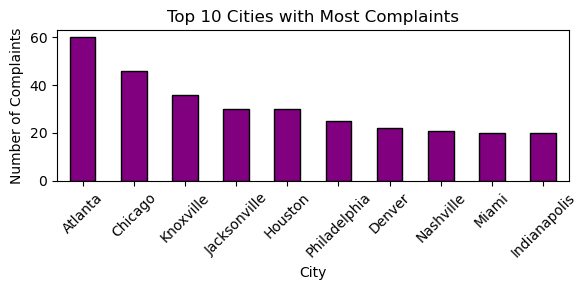

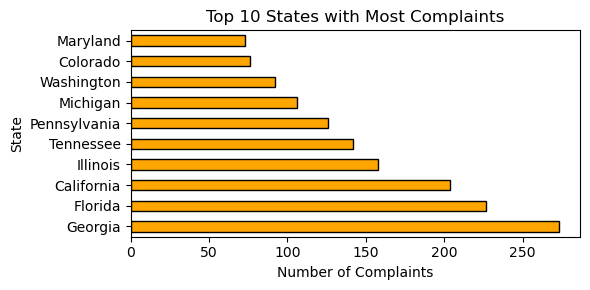

In [35]:
# Top 10 kota dengan keluhan terbanyak
top_cities = df['city'].value_counts().head(10)

plt.figure(figsize=(6, 3))
top_cities.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Cities with Most Complaints')
plt.ylabel('Number of Complaints')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 negara bagian dengan keluhan terbanyak
state_counts = df['state'].value_counts().head(10)
plt.figure(figsize=(6, 3))
state_counts.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Top 10 States with Most Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('State')
plt.tight_layout()
plt.show()

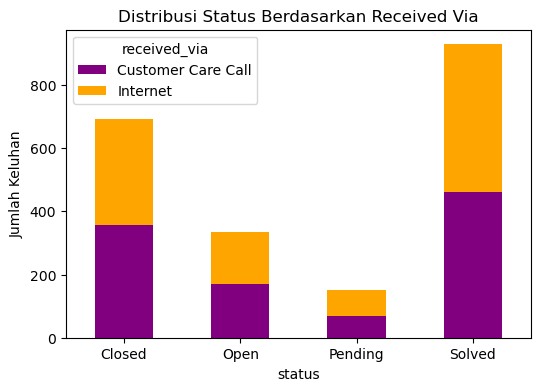

In [36]:
# Distribusi status berdasarkan 'received_via' (Stacked Bar Plot)
plt.figure(figsize=(6, 4))
status_received_via = pd.crosstab(df['status'], df['received_via'])
colors = ['purple', 'orange', 'blue']
status_received_via.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title('Distribusi Status Berdasarkan Received Via')
plt.ylabel('Jumlah Keluhan')
plt.xticks(rotation=0)
plt.show()

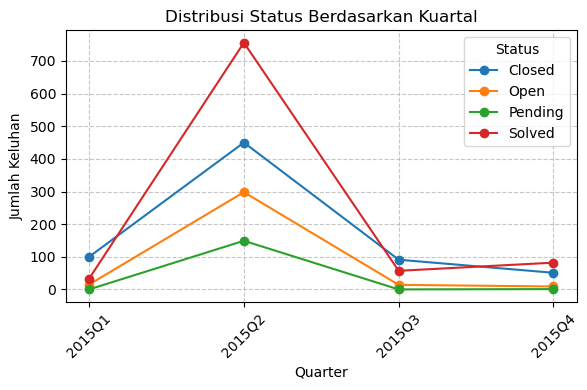

In [37]:
# Distribusi status berdasarkan kuartal
df['quarter'] = df['date'].dt.to_period('Q').astype(str)
status_by_quarter = pd.crosstab(df['quarter'], df['status'])

# Membuat line chart
plt.figure(figsize=(6, 4))
for status in status_by_quarter.columns:
    plt.plot(status_by_quarter.index, status_by_quarter[status], marker='o', label=status)

# Labeling
plt.title('Distribusi Status Berdasarkan Kuartal')
plt.xlabel('Quarter')
plt.ylabel('Jumlah Keluhan')
plt.xticks(ticks=range(len(status_by_quarter.index)), labels=status_by_quarter.index, rotation=45)
plt.legend(title='Status')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.3 Univariate Analysis (Melihat korelasi antar kolom)

Pada tahap ini kita gunakan metode chisquare dengan cramers v untuk perhitungan nilai korelasi sehubungan dengan tipe data yang digunakan adalah object.

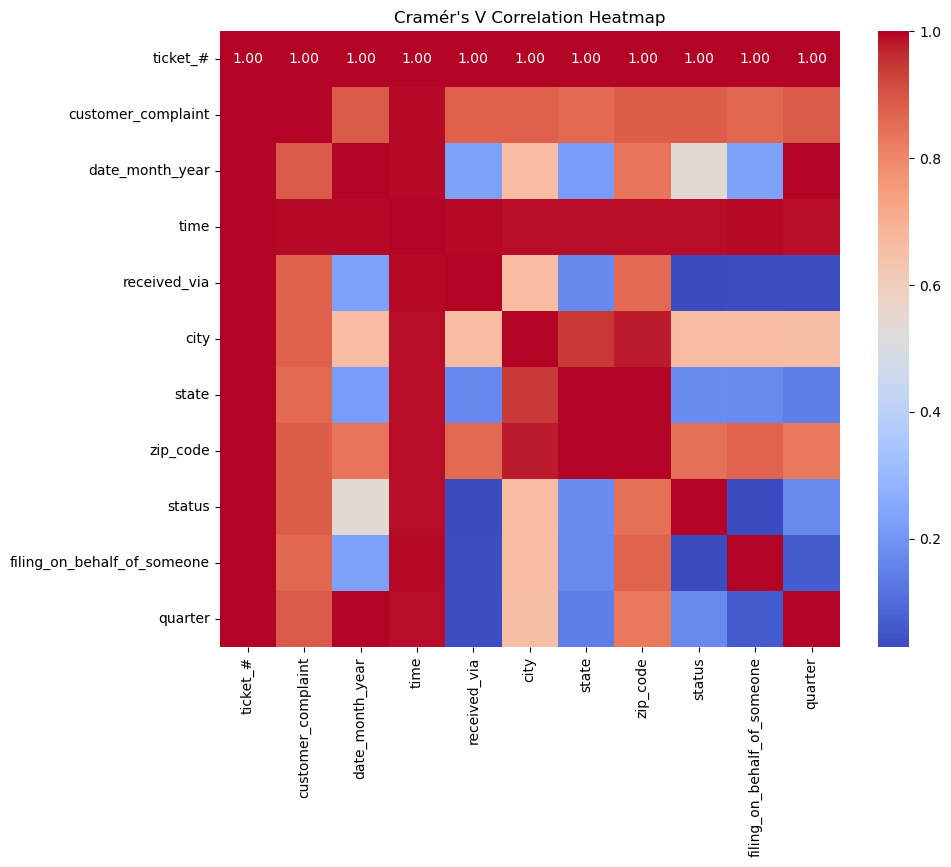

In [40]:
import numpy as np
from scipy.stats import chi2_contingency

# Fungsi untuk menghitung Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Tabel kontingensi
    chi2, _, _, _ = chi2_contingency(contingency_table)  # Hitung chi-squared
    n = contingency_table.sum().sum()  # Total observasi
    r, k = contingency_table.shape  # Dimensi tabel
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Hitung matriks Cramér's V untuk setiap pasangan kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
cramers_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0  # Korelasi dengan diri sendiri = 1
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Konversi ke tipe numerik
cramers_matrix = cramers_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

In [41]:
df['time'] = pd.to_datetime(df['time'], format='%I:%M:%S %p', errors='coerce').dt.time
df.head()

,ticket_#,customer_complaint,date,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone,quarter
0,250635,DISNEY CABLE INTERNET SPEEDS,2015-04-22,22-Apr-15,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015Q2
1,223441,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,2015-08-04,4-Aug-15,10:22:56,Internet,Acworth,Georgia,30102,Closed,No,2015Q3
2,242732,SPEED AND SERVICE,2015-04-18,18-Apr-15,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,2015Q2
3,277946,DISNEY IMPOSED A NEW USAGE CAP OF 300GB THAT P...,2015-07-05,5-Jul-15,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,2015Q3
4,307175,DISNEY NOT WORKING AND NO SERVICE TO BOOT,2015-05-26,26-May-15,13:25:26,Internet,Acworth,Georgia,30101,Solved,No,2015Q2


### 5. Feature Extraction

In [43]:
# Membuat kategori waktu
def categorize_time(t):
    if pd.isna(t):  # Jika waktu tidak valid
        return 'Lainnya'
    hour = t.hour
    if 7 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 14:
        return 'Afternoon'
    elif 15 <= hour <= 18:
        return 'Evening'
    elif 19 <= hour <= 21:
        return 'Night'
    else:
        return 'Others'

# Terapkan fungsi ke kolom time
df['time_category'] = df['time'].apply(categorize_time)
df.head()

,ticket_#,customer_complaint,date,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone,quarter,time_category
0,250635,DISNEY CABLE INTERNET SPEEDS,2015-04-22,22-Apr-15,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015Q2,Evening
1,223441,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,2015-08-04,4-Aug-15,10:22:56,Internet,Acworth,Georgia,30102,Closed,No,2015Q3,Morning
2,242732,SPEED AND SERVICE,2015-04-18,18-Apr-15,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,2015Q2,Morning
3,277946,DISNEY IMPOSED A NEW USAGE CAP OF 300GB THAT P...,2015-07-05,5-Jul-15,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,2015Q3,Morning
4,307175,DISNEY NOT WORKING AND NO SERVICE TO BOOT,2015-05-26,26-May-15,13:25:26,Internet,Acworth,Georgia,30101,Solved,No,2015Q2,Afternoon


### 6. Clustering

Karena penulisan kelompok kolom customer_complaints tidak terstandarisasi, maka diperlukan clustering untuk mengelompokkan data keluhan pelanggan menjadi data yang terkategori.

In [46]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Lakukan pembuatan 'tdif_matrix'
text_data = df['customer_complaint']
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Lakukan clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)

# Lihat hasil cluster
clusters = kmeans.labels_
print(clusters)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 4 0]


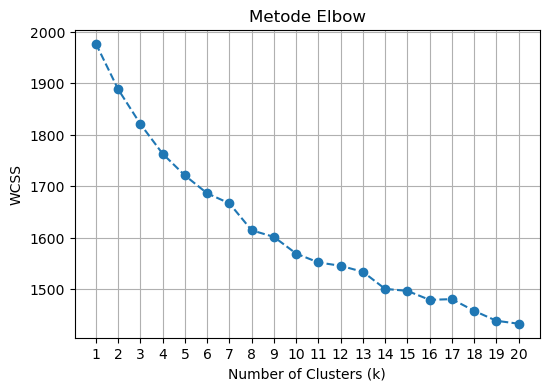

In [47]:
# Validasi dengan Elbow Method
wcss = []
k_values = range(1, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [48]:
# Tentukan jumlah cluster optimal
k_optimal = 6
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign label cluster ke data
df['cluster'] = kmeans.labels_

# Lihat hasil
for cluster in range(k_optimal):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['customer_complaint'].head(10))
    print("\n")

Cluster 0:
1          PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED
3     DISNEY IMPOSED A NEW USAGE CAP OF 300GB THAT P...
4             DISNEY NOT WORKING AND NO SERVICE TO BOOT
5     ISP CHARGING FOR ARBITRARY DATA LIMITS WITH OV...
7     DISNEY REFUSES TO HELP TROUBLESHOOT AND CORREC...
8                               DISNEY EXTENDED OUTAGES
9     DISNEY RAISING PRICES AND NOT BEING AVAILABLE ...
10    BILLING AFTER SERVICE WAS ASKED TO BE DISCONNE...
11        YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE
12    DISNEY VIOLATING OPEN INTERNET RULES BY BLOCKI...
Name: customer_complaint, dtype: object


Cluster 1:
6         THROTTLING SERVICE AND UNREASONABLE DATA CAPS
30                                     DISNEY DATA CAPS
31                             DISNEY INTERNET DATA CAP
33                           DISNEY DATA INTERNET USAGE
72    DISNEY USING A DATA CAP TO TAKE HOWEVER MUCH M...
73                                      DISNEY DATA CAP
81                                LEGALI

In [49]:
# Buat mapping cluster ke label
cluster_labels = {
    0: "Technical Service Issues",
    1: "Billing Issues",
    2: "Data Caps & Throttling",
    3: "Internet Speed Issues",
    4: "Cable Issues",
    5: "General Disney Issues",}

# Tambahkan label ke dataset
df['cluster_label'] = df['cluster'].map(cluster_labels)

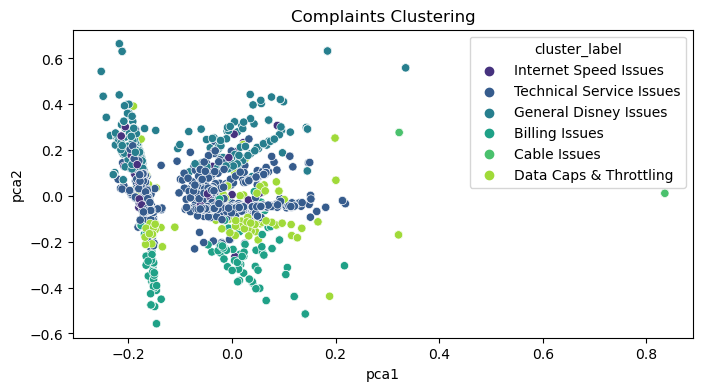

In [50]:
# Plot PCA
from sklearn.decomposition import PCA
import seaborn as sns

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Tambahkan hasil PCA ke dataframe
df['pca1'] = reduced_data[:, 0]
df['pca2'] = reduced_data[:, 1]

# Plot hasil cluster
plt.figure(figsize=(8, 4))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_label', data=df, palette='viridis')
plt.title('Complaints Clustering')
plt.show()

In [51]:
df.head()

,ticket_#,customer_complaint,date,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone,quarter,time_category,cluster,cluster_label,pca1,pca2
0,250635,DISNEY CABLE INTERNET SPEEDS,2015-04-22,22-Apr-15,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015Q2,Evening,3,Internet Speed Issues,0.022147,0.232928
1,223441,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,2015-08-04,4-Aug-15,10:22:56,Internet,Acworth,Georgia,30102,Closed,No,2015Q3,Morning,0,Technical Service Issues,-0.164719,0.011771
2,242732,SPEED AND SERVICE,2015-04-18,18-Apr-15,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,2015Q2,Morning,5,General Disney Issues,-0.234404,0.263202
3,277946,DISNEY IMPOSED A NEW USAGE CAP OF 300GB THAT P...,2015-07-05,5-Jul-15,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,2015Q3,Morning,0,Technical Service Issues,-0.062459,-0.158819
4,307175,DISNEY NOT WORKING AND NO SERVICE TO BOOT,2015-05-26,26-May-15,13:25:26,Internet,Acworth,Georgia,30101,Solved,No,2015Q2,Afternoon,0,Technical Service Issues,-0.017442,0.039614


### 7. Feature Selection

Beberapa kolom tidak digunakan untuk tahapan visualisasi, diantaranya adalah:
- date_month_year: kolom ini sudah terwakili kolom date
- time: kolom ini sudah disederhanakan menjadi kolom time_category
- zip_code: kolom ini dianggap kurang bermanfaat untuk visulisasi
- quarter: kolom ini sudah menjadi bagian dari kolom date
- cluster: kolom ini sudah terlabel dari kolom cluster_label
- pca1 dan pca2: kolom ini dianggap kurang bermanfaat untuk visualisasi

In [54]:
# Daftar kolom yang ingin di-drop
kolom_drop = ['date_month_year', 'time', 'zip_code', 'quarter', 'cluster', 'pca1', 'pca2']

# Menghapus kolom-kolom yang tidak diperlukan
df_final = df.drop(columns=kolom_drop)
df_final.head()

,ticket_#,customer_complaint,date,received_via,city,state,status,filing_on_behalf_of_someone,time_category,cluster_label
0,250635,DISNEY CABLE INTERNET SPEEDS,2015-04-22,Customer Care Call,Abingdon,Maryland,Closed,No,Evening,Internet Speed Issues
1,223441,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,2015-08-04,Internet,Acworth,Georgia,Closed,No,Morning,Technical Service Issues
2,242732,SPEED AND SERVICE,2015-04-18,Internet,Acworth,Georgia,Closed,Yes,Morning,General Disney Issues
3,277946,DISNEY IMPOSED A NEW USAGE CAP OF 300GB THAT P...,2015-07-05,Internet,Acworth,Georgia,Open,Yes,Morning,Technical Service Issues
4,307175,DISNEY NOT WORKING AND NO SERVICE TO BOOT,2015-05-26,Internet,Acworth,Georgia,Solved,No,Afternoon,Technical Service Issues


### Exporting Data

In [56]:
# Ekspor Tabel Untuk Dialnjutkan ke BI Tool
df_final.to_csv("Technical_Test_Processed_Data.csv", index=False)